In [72]:
#### SVM  PEGASOS ####

In [1]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [6]:
X,y = make_classification(n_samples = 1000, n_features=2,n_informative = 2, n_redundant=0,random_state = 3,n_classes=2,n_clusters_per_class=1)

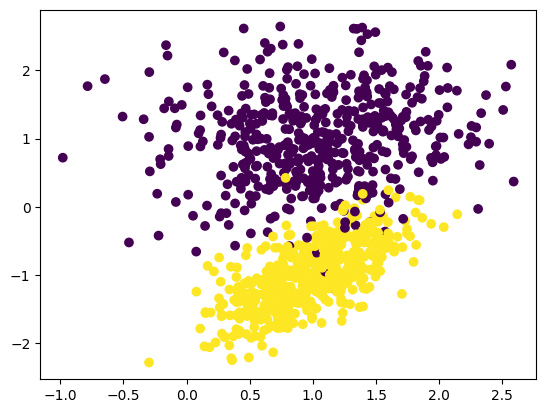

In [7]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [9]:
# the y we get is in [0,1] format. We want it in [-1,1]
y[y==0]=-1

In [36]:
class SVM:
    def __init__(self,C=0.01,lr=0.01,epochs=1000):
        self.C =C
        self.lr = lr
        self.epochs = epochs

    def fit(self,X,y):
        self.th,self.b,self.errorGD = self.gradient_descent(X,y)
        
 
    def predict(self,x_test):                   # hypothesis
        y_pred = self.th@x_test.T + self.b
        y_pred[y_pred >= 0] = 1
        y_pred[y_pred < 0]= -1
        return y_pred
        
        
    def hinge_loss(self,X,y,th,b):             #error
        ti= self.functional_margin(X,y,th,b)
        er=1-ti
        er[er < 0] = 0
        return 0.5*(th@th)+self.C*np.sum(er)
        

    def functional_margin(self,X,y,th,b):     
        return y*(th@X.T+b)
        
        
    def gradient_descent(self,X,y):
        th = np.zeros(X.shape[1])
        b = 0
        errorGD = []
        for i in range(self.epochs):
            errorGD.append(self.hinge_loss(X,y,th,b))
            
            ti = self.functional_margin(X,y,th,b)
            ti[ti < 1] = -1
            ti[ti >= 1] = 0 
            gradient= th +self.C*(ti*y)@X
            

            th = th - self.lr*gradient
            b = b - self.lr*(self.C*np.sum(ti*y))
        
        return th,b,errorGD

    def accuracy_score(self,y_true, y_pred):
       return np.mean(y_true==y_pred)


In [67]:
clf = SVM(C=0.01,epochs =200)

In [68]:
clf.fit(X,y)
clf.accuracy_score(y,clf.predict(X))

0.967

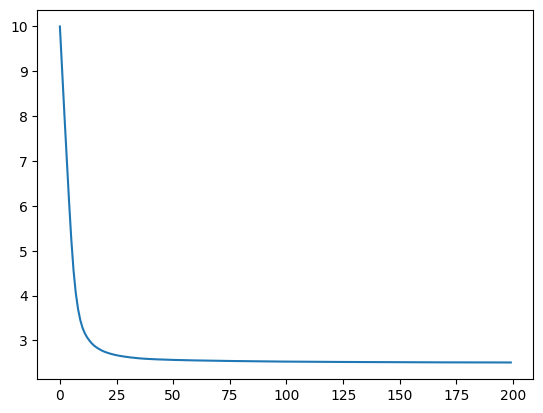

9.004443243568659
3.1586424097910766
2.723501732263345
2.6219189383878088
2.5818879250819013
2.564295346612437
2.553086999879942
2.544723212224354
2.53772839386176
2.5316864218456256
2.5272712968138134
2.523733255806123
2.5207476104016653
2.518170458354426
2.515810851509232
2.5136680902426507
2.5119216138122757
2.5106575856181963
2.5096331928265965
2.5087997555146626


In [69]:
plt.plot(clf.errorGD)
plt.show()
for i in range(1,200,10):
    print(clf.errorGD[i])

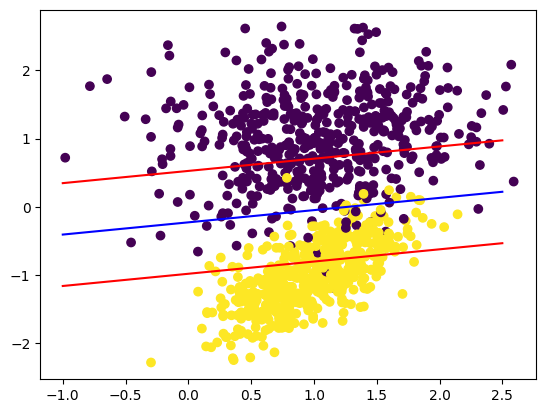

In [70]:
x1= np.linspace(-1,2.5,100)
x2 = -(clf.b + clf.th[0]*x1)/clf.th[1]
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(x1,x2,c='b')
plt.plot(x1,x2+1/np.linalg.norm(clf.th,ord=2),c='r')
plt.plot(x1,x2-1/np.linalg.norm(clf.th,ord=2),c='r')
plt.show()

In [71]:
# If we decrease the C - the support vector's distance from hyperplane will increase. The order of error will decrease since more closer points are being considered as error(ambiguous). 
#Although the hyperplane will be moreover same (will not be exactly same, it will change as different points are closest to support vector)
#So accuracy will be more or less same.

#So when C is increasing, we are overfitting. and C decrease , then underfitting.